Examen Aprendizaje Automático 30 05 22

In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 5.2 MB/s 


In [1]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 411 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=37b3ec89f951e094ba6bc8ab016975d89d920af68d2b6ce54221ad8f8c10fca0
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [174]:
# Importo librerías
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

1.- Lee un fichero xxx.csv o crea uno que contenga al menos 30 filas por 10
columnas, de las cuales una columna tipo object debe tener dos opciones y otras
dos columnas tipo object debe contener tres o más opciones. Al menos dos
columnas debe contener nulos.

In [175]:
fich= "/content/Animales.csv"
df = pd.read_csv(fich, encoding='latin-1')
df

,Animal,Patas,Escamas,Plumas,Tipo,Carnivoro,Herbivoro,Nula,Peso,Granja
0,Perro,4.0,No,No,Mamifero,Si,No,5tre,6,Si
1,Gato,4.0,No,No,Reptil,Si,No,re,4,Si
2,Pez,0.0,Si,No,NaN,No,Si,ertert,1,No
3,Rata,4.0,No,No,Mamifero,No,Si,ertert,1,No
4,Caballo,4.0,No,No,Mamifero,No,Si,ertert,9,Si
5,Serpiente,0.0,Si,No,Reptil,Si,No,ertert,3,No
6,Dinosaurio,NaN,Si,No,NaN,Si,No,rgfg,10,No
7,Murcielago,2.0,No,No,Mamifero,No,Si,tgrw,1,No
8,Hammster,4.0,No,No,Mamifero,No,Si,gfg,1,No
9,Lobo,4.0,No,No,Mamifero,Si,No,fdg,7,No


2.- Transforma las columnas object a categóricas y posteriormente a numéricas.
Una columna categórica de dos opciones a columnas dummy y elimina dicha
columna categórica. Una columna categórica de mas de dos opciones mediante
cat codes. La otra columna categórica de mas de dos opciones mediante
LabelEncoder.

In [176]:
df.dtypes

Animal        object
Patas        float64
Escamas       object
Plumas        object
Tipo          object
Carnivoro     object
Herbivoro     object
Nula          object
Peso           int64
Granja        object
dtype: object

In [177]:
#TABLA DUMMY 
df_dummy=pd.get_dummies(df.Escamas,prefix="Escamas")
df=pd.concat([df, df_dummy],axis=1)
df=df.drop(["Escamas"],axis=1)

In [178]:
df.dtypes

Animal         object
Patas         float64
Plumas         object
Tipo           object
Carnivoro      object
Herbivoro      object
Nula           object
Peso            int64
Granja         object
Escamas_No      uint8
Escamas_Si      uint8
dtype: object

In [179]:
df=df.drop(["Nula"],axis=1)

In [180]:
df["Tipo"]=pd.Categorical(df["Tipo"])
df["Tipo"]=df["Tipo"].cat.codes

In [181]:
df.dtypes

Animal         object
Patas         float64
Plumas         object
Tipo             int8
Carnivoro      object
Herbivoro      object
Peso            int64
Granja         object
Escamas_No      uint8
Escamas_Si      uint8
dtype: object

In [182]:
le = LabelEncoder()
df.Animal = le.fit_transform(df.Animal.values)
df.Plumas = le.fit_transform(df.Plumas.values)
df.Carnivoro = le.fit_transform(df.Carnivoro.values)
df.Herbivoro = le.fit_transform(df.Herbivoro.values)
df.Granja = le.fit_transform(df.Granja.values)

In [183]:
df.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

3.- Rellena los nulos

In [184]:
df.isnull().sum()

Animal        0
Patas         1
Plumas        0
Tipo          0
Carnivoro     0
Herbivoro     0
Peso          0
Granja        0
Escamas_No    0
Escamas_Si    0
dtype: int64

In [185]:
# El resto de nulos automáticamente se rellenan al transformar los datos

df['Patas'].fillna(0, inplace = True)


In [186]:
df.isnull().sum()

Animal        0
Patas         0
Plumas        0
Tipo          0
Carnivoro     0
Herbivoro     0
Peso          0
Granja        0
Escamas_No    0
Escamas_Si    0
dtype: int64

In [187]:
df.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

4.- Dibuja el histograma de cada columna

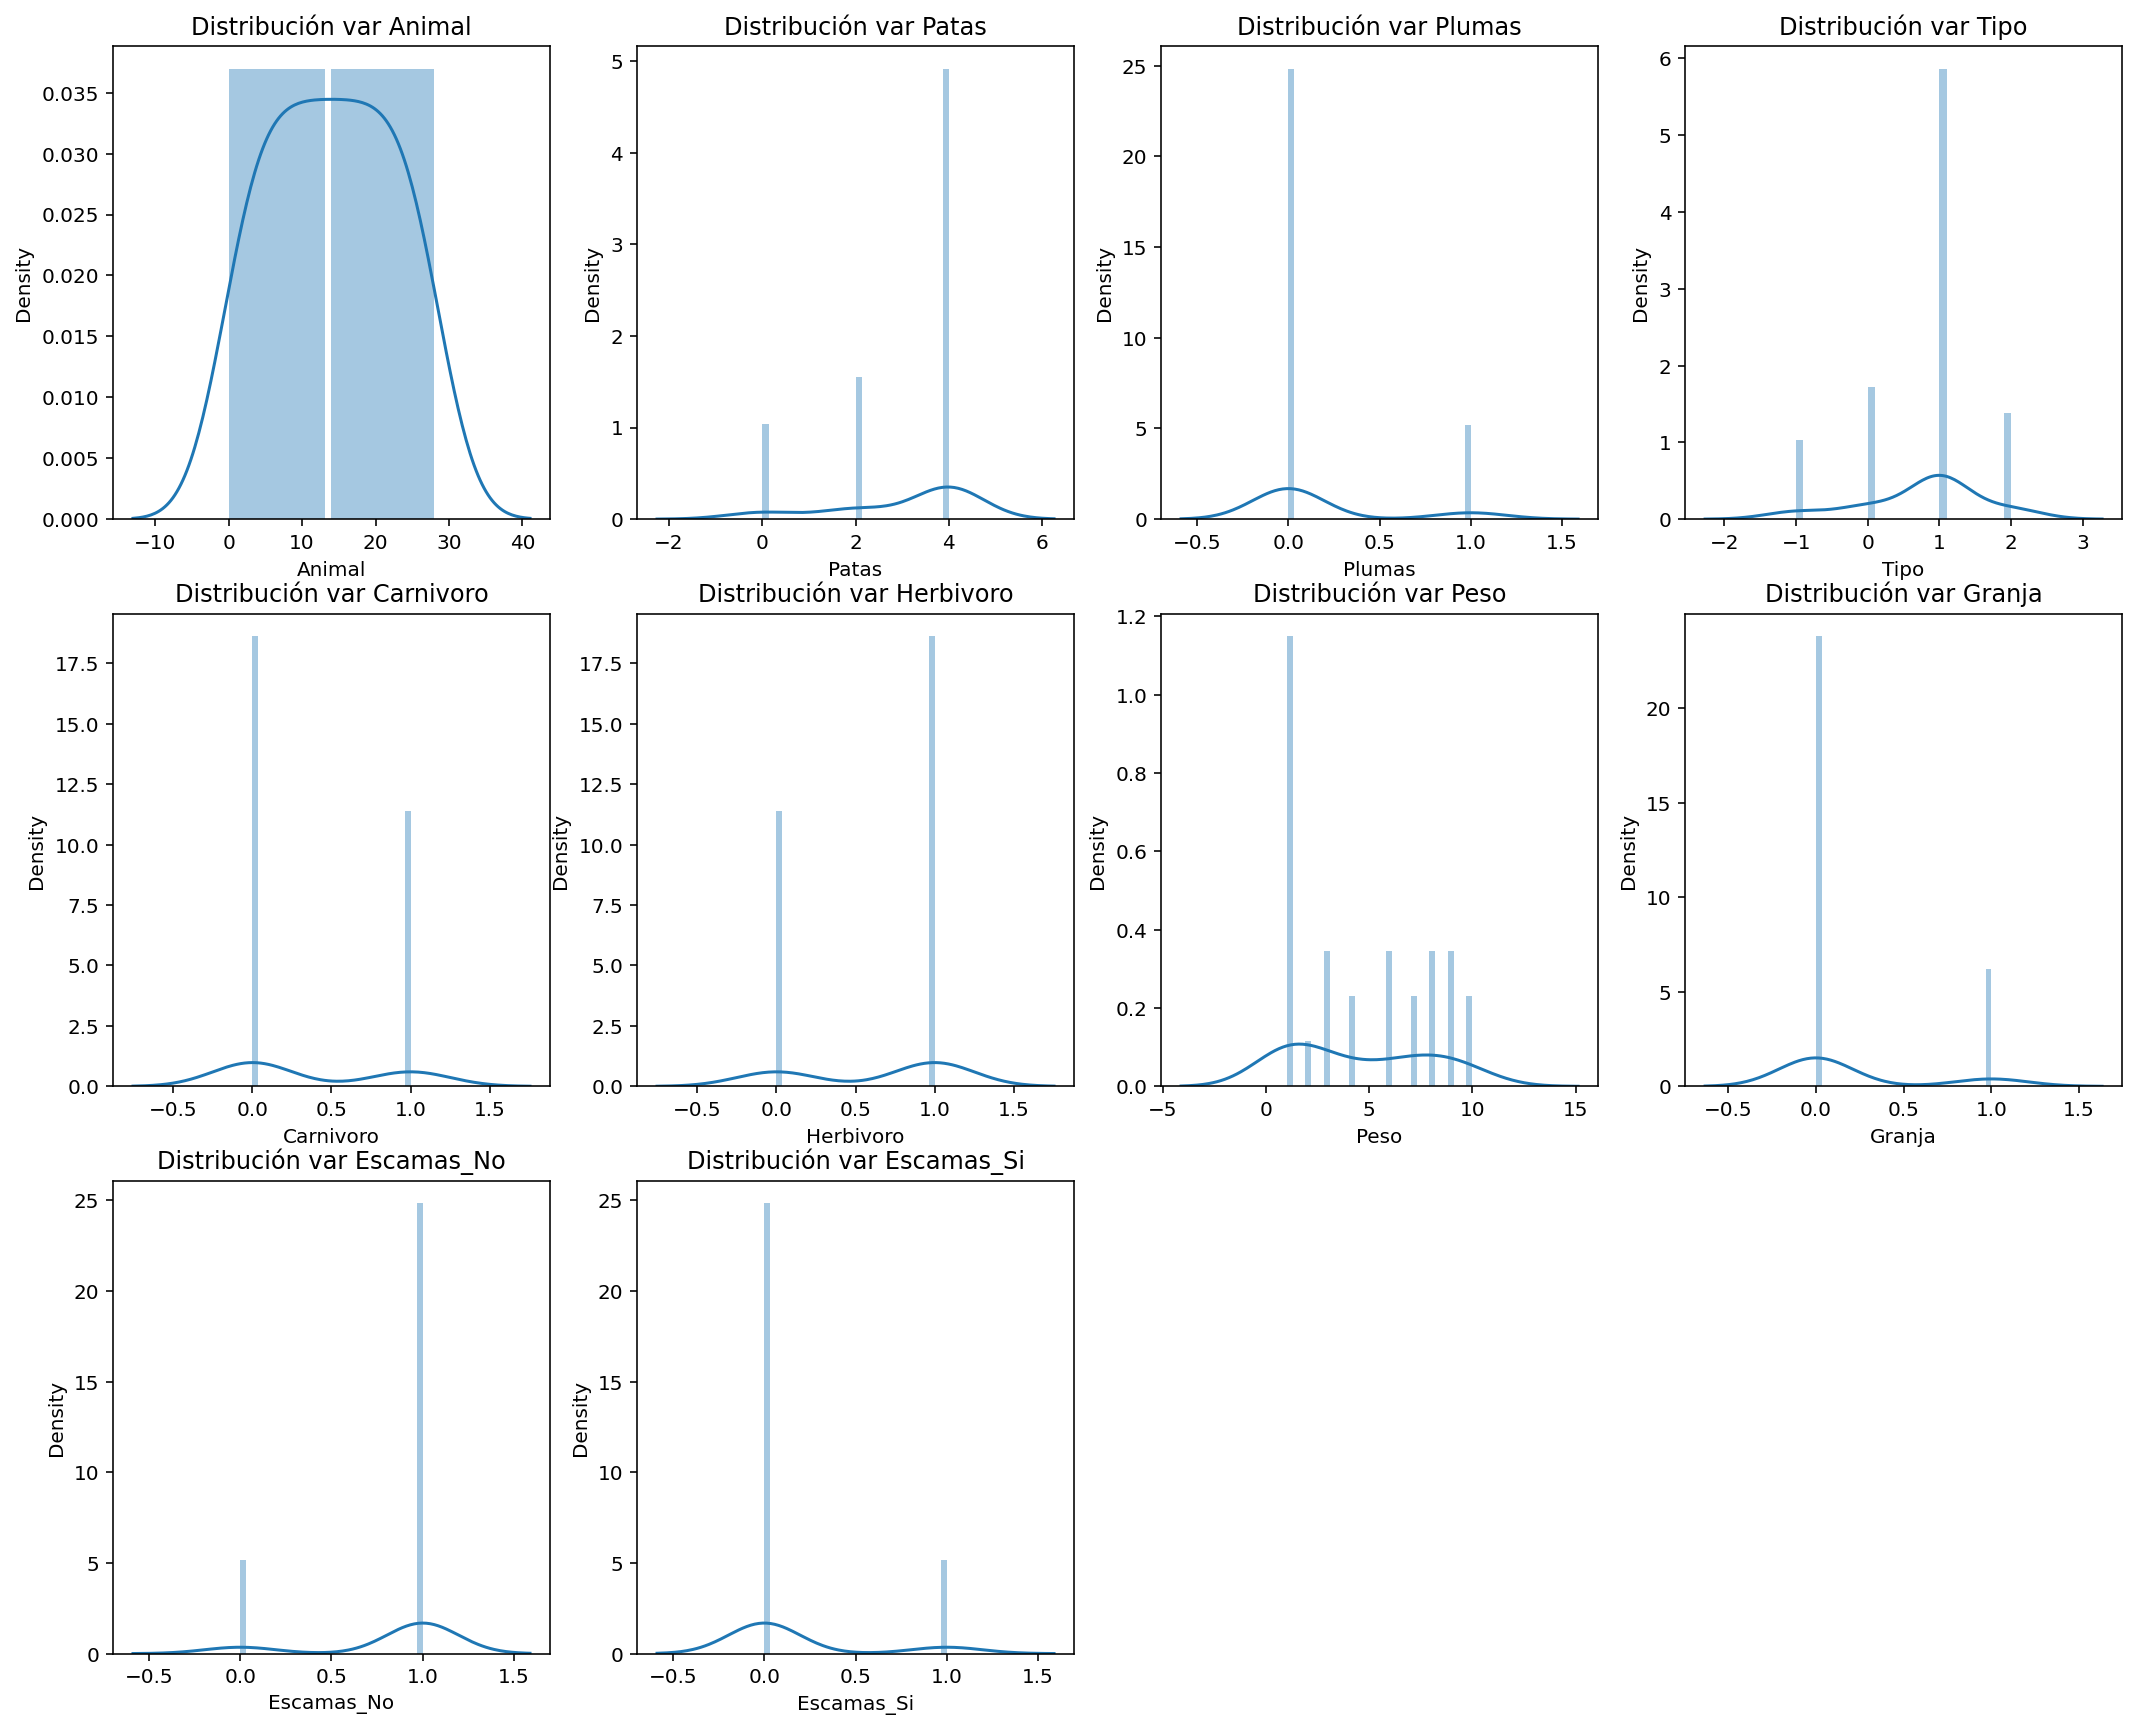

In [128]:
plt.figure(figsize=(18,20))
n = 0
for i, column in enumerate(df.columns):
    n+=1
    plt.subplot(4, 4, n)
    try:
        sns.distplot(df[column], bins=30)
    except:
        pass
    plt.title('Distribución var {}'.format(column))
plt.show()

5.- Aplica el test de Shapiro

In [129]:
numerics = ['int16','int32','int64','float16','float32','float64']
variables_numericas = df.select_dtypes(include=numerics)
variables_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Animal     29 non-null     int64  
 1   Patas      29 non-null     float64
 2   Plumas     29 non-null     int64  
 3   Carnivoro  29 non-null     int64  
 4   Herbivoro  29 non-null     int64  
 5   Peso       29 non-null     int64  
 6   Granja     29 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 1.7 KB


In [130]:
from scipy.stats import shapiro
for columna_numerica in variables_numericas.columns:
    stat, p = shapiro(df[columna_numerica])
    
    print('Valor de test=%.3f, p-value=%.3f' % (stat,p))
    
    alpha=0.05
    if p > alpha:
        print('La variable ',columna_numerica,' proviene de una distribución normal (rechazamos H0), por lo tanto H1')
    else:
        print('La variable ',columna_numerica,' no proviene de una distribución normal (rechazamos H0) por lo tanto H1')

Valor de test=0.958, p-value=0.287
La variable  Animal  proviene de una distribución normal (rechazamos H0), por lo tanto H1
Valor de test=0.663, p-value=0.000
La variable  Patas  no proviene de una distribución normal (rechazamos H0) por lo tanto H1
Valor de test=0.460, p-value=0.000
La variable  Plumas  no proviene de una distribución normal (rechazamos H0) por lo tanto H1
Valor de test=0.617, p-value=0.000
La variable  Carnivoro  no proviene de una distribución normal (rechazamos H0) por lo tanto H1
Valor de test=0.617, p-value=0.000
La variable  Herbivoro  no proviene de una distribución normal (rechazamos H0) por lo tanto H1
Valor de test=0.853, p-value=0.001
La variable  Peso  no proviene de una distribución normal (rechazamos H0) por lo tanto H1
Valor de test=0.500, p-value=0.000
La variable  Granja  no proviene de una distribución normal (rechazamos H0) por lo tanto H1


6.- Dibula el gráfico de la matriz de correlación

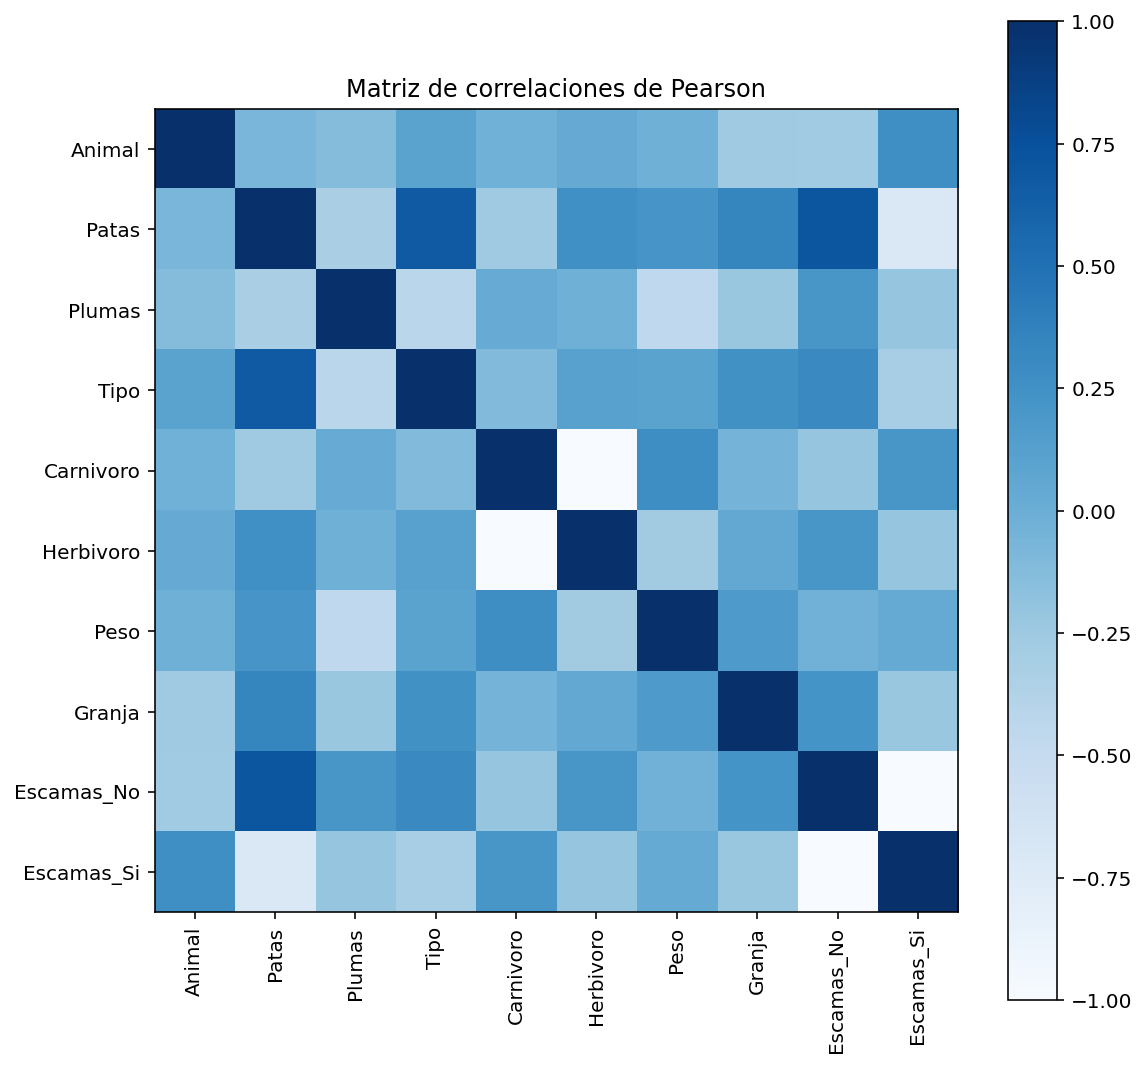

In [131]:
matriz_correlaciones = df.corr(method='pearson')
n_ticks = len(df.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), df.columns, rotation='vertical')
plt.yticks(range(n_ticks), df.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

7.- Normaliza los datos numéricos y divídelos en train y test

In [132]:
X = df.drop('Granja', axis=1)
Y = df['Granja']

In [133]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
Escamas_Si,-1.000000
Patas,-0.703418
Tipo,-0.312464
Animal,0.272772
Escamas_No,-0.233126
Plumas,-0.208333
Herbivoro,-0.207600
Carnivoro,0.207600
Peso,0.034484


In [134]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

8.- Aplica el modelo de Regresión Logística, umbraliza los datos y matriz de
confusión

In [136]:
modelo = LogisticRegression()
parametros = {"C": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}

In [137]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros,cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                               0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [138]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.01, 'class_weight': 'balanced'} 
ROC AUC: 0.72


In [139]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

In [140]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

In [141]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.01, class_weight='balanced')

In [142]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

In [143]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [144]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [145]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))

Matriz de confusión
 [[5 0]
 [1 0]]

Accuracy	0.83
Sensitividad	0.0
Precisión	0.0


9.- Aplica el modelo de Arboles de Decisión, umbraliza los datos y matriz de
confusión

In [146]:
regr = DecisionTreeRegressor()
params = {"max_depth": range(3, 7)}
regr_opt = GridSearchCV(regr, params, cv=3)
regr_opt.fit(X_train, Y_train)
print('El mejor estimador es: {}'.format(regr_opt.best_estimator_))

El mejor estimador es: DecisionTreeRegressor(max_depth=5)


In [147]:
y_test_pred = regr_opt.predict(X_test)
y_test_pred.shape

(6,)

In [148]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred[:] > umbral)

In [149]:
Y_test.shape

(6,)

In [150]:
Y_test

2     0
20    0
23    0
13    0
11    0
25    1
Name: Granja, dtype: int64

In [151]:
y_umbralizadas.shape

(6,)

In [152]:
y_umbralizadas

array([0, 0, 1, 0, 0, 0])

In [153]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[4 1]
 [1 0]]


10.- Aplica el modelo de KNN Vecinos , umbraliza los datos y matriz de
confusión

In [154]:
y_ruido = np.sin(X_train)[:, 0] + np.random.normal(size=X_train.shape[0],scale=0.20)

In [155]:
x_train2=X_train[:,0]

In [156]:
clf = KNeighborsRegressor()
params = {"n_neighbors": range(1, 20)}

In [157]:
clf_gs = GridSearchCV(clf, params, cv=3)
clf_gs.fit(X_train, Y_train)
print('El mejor estimador es: {}'.format(clf_gs.best_estimator_))

El mejor estimador es: KNeighborsRegressor(n_neighbors=14)


In [158]:
y_test_predict=clf_gs.predict(X_test)

In [159]:
umbral = 0.6
y_umbralizadas = 1*(y_test_predict[:] > umbral)

In [160]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[5 0]
 [1 0]]


11.- Aplica el modelo clustering no jerárquico K-medias

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


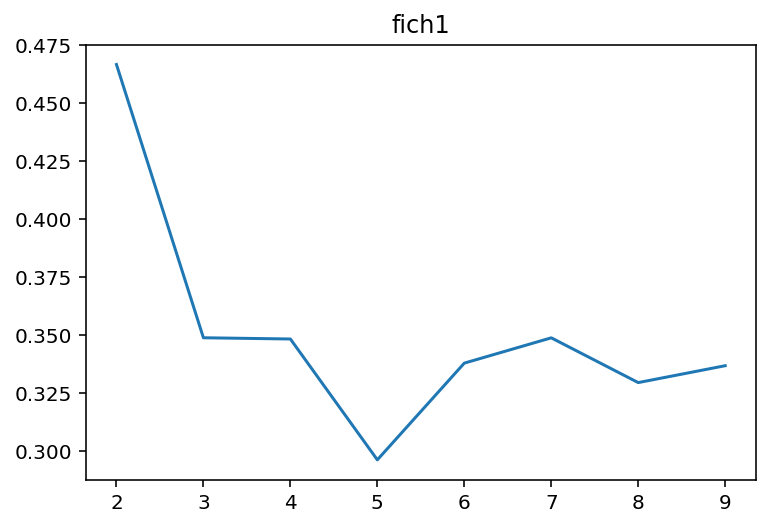

In [71]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


df.head()

col_names = list(df.columns)
col_names.remove('Granja')

Granja = df[col_names]

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)
    
plot_sillhouette(Granja, 'fich1')

12.- Aplica el modelo clustering jerárquico

In [98]:
# Defino una función para representar el dendograma
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    fig = plt.figure(figsize=(20,3))
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

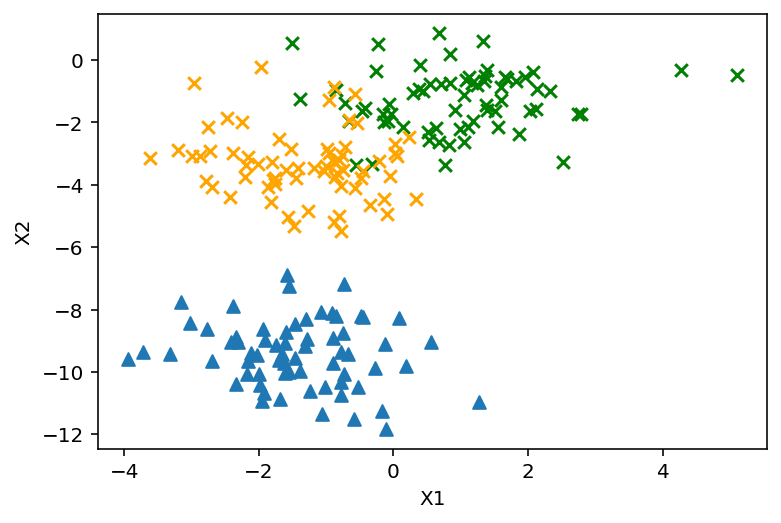

In [101]:
X, y = make_blobs(centers=3, random_state=2, n_samples=200)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Clase Y=0", marker="^") 
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Clase Y=1", c="green", marker="x")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=40, label="Clase Y=2", c="orange", marker="x")
plt.xlabel("X1") 
plt.ylabel("X2") 
plt.show()

13.- Aplica el modelo de análisis de componentes principales PCA

In [74]:
print ('tamaño X: ',X.size)
print ('tamaño Y: ',Y.size)

tamaño X:  261
tamaño Y:  29


In [75]:
scaler = StandardScaler()
X_escaladas = scaler.fit_transform(X)

In [78]:
pca = PCA()
pca.fit(X_escaladas)

PCA()

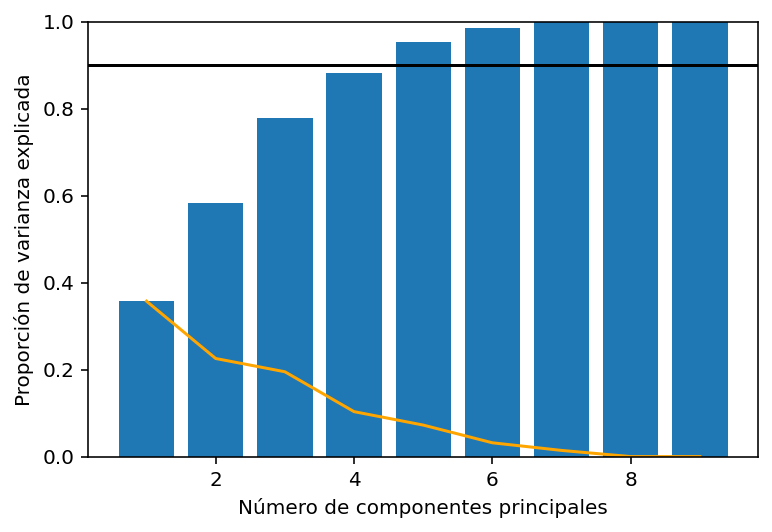

In [87]:
plt.plot(range(1,10), pca.explained_variance_ratio_, c="orange")
plt.bar(range(1,10), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(u"Número de componentes principales")
plt.ylabel(u"Proporción de varianza explicada")
plt.ylim(0, 1)
plt.axhline(0.90, c="black")
plt.show()

In [88]:
pca = PCA(n_components=2)
pca.fit(X_escaladas)
comp_principales = pca.transform(X_escaladas)

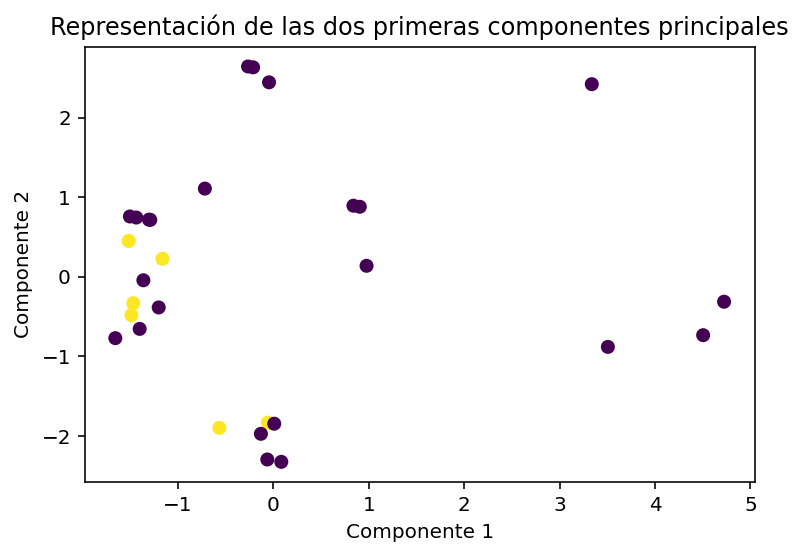

In [89]:
plt.scatter(comp_principales[:, 0], comp_principales[:, 1], c=Y)
plt.title(u'Representación de las dos primeras componentes principales')
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

14.- Aplica el modelo de análisis factorial

In [ ]:
# Con el csv que he elagido da fallos este modelo, dice que es una matriz singular, para poder realizar el modelo voy a utilizar
# el csv EXA4 del examen anterior.


In [ ]:
# 1.- Lee un fichero xxx.csv
fich1= 'EXA4.csv'
df = pd.read_csv(fich1)
df

,ID,ESTUDIOS,IDIOMAS,ERASMUS,PRESIONARTERIAL,ASTRONAUTA
0,1,bachillerato,english,si,12,si
1,2,fp,NaN,no,14,no
2,3,fp,NaN,no,14,no
3,4,eso,NaN,si,12,si
4,5,NaN,english,si,13,si
5,6,fp,NaN,NaN,14,no
6,7,universitarios,NaN,no,14,no
7,8,eso,english,si,14,no
8,9,NaN,NaN,no,13,si
9,10,universitarios,english,si,12,si


In [ ]:
df.ESTUDIOS = le.fit_transform(df.ESTUDIOS.values)
df.IDIOMAS = le.fit_transform(df.IDIOMAS.values)
df.ERASMUS = le.fit_transform(df.ERASMUS.values)
df.ASTRONAUTA = le.fit_transform(df.ASTRONAUTA.values)

In [ ]:
# Importo librerías
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer # pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt


# Realizo el test de Kaiser-Meyer-Olkin
# Indica cómo de adecuada es la muestra a hacer un análisis factorial
# Los valores entre 0.5 y 1 indican que es apropiado aplicarlo
kmo_all,kmo_model=calculate_kmo(df)
print('El valor KMO es: {}\n[0.5-1] -> Valores adecuados para análisis factorial'.format(round(kmo_model,2)))

El valor KMO es: 0.62
[0.5-1] -> Valores adecuados para análisis factorial


In [ ]:
# Criterio 1: Kaiser Criterion
# Compruebo los autovalores > 1
ev, v = fa.get_eigenvalues()
print('--- Criterio 1: Kaiser Criterion')
print(u'El número de factores adecuado según el criterio de Kaiser (autovalor>1) es {}'.format(sum(ev>1)))

--- Criterio 1: Kaiser Criterion
El número de factores adecuado según el criterio de Kaiser (autovalor>1) es 2



--- Criterio 2: gráfica de sedimentación


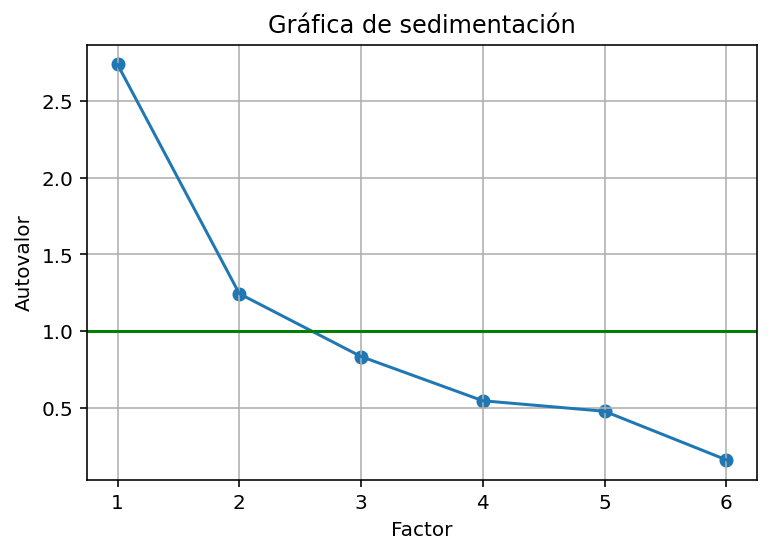

In [ ]:
# Criterio 2: gráfica de sedimentación
# Compruebo un codo en la gráfica, punto en el que está el
# número de factores
print('\n--- Criterio 2: gráfica de sedimentación')
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title(u'Gráfica de sedimentación')
plt.xlabel('Factor')
plt.ylabel('Autovalor')
plt.axhline(1, c="green")
plt.grid()
plt.show()

15.- Aplica el modelo de red neuronal keras

In [161]:
from tensorflow.keras.optimizers import SGD
# Librerías generales
import pandas as pd
import numpy as np

# Librerías para visualización
%pylab
%matplotlib inline
%config InlineBacked.figure_format='retina'
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Librerías Keras
from keras.models import Sequential
from keras.layers.core import Dense

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


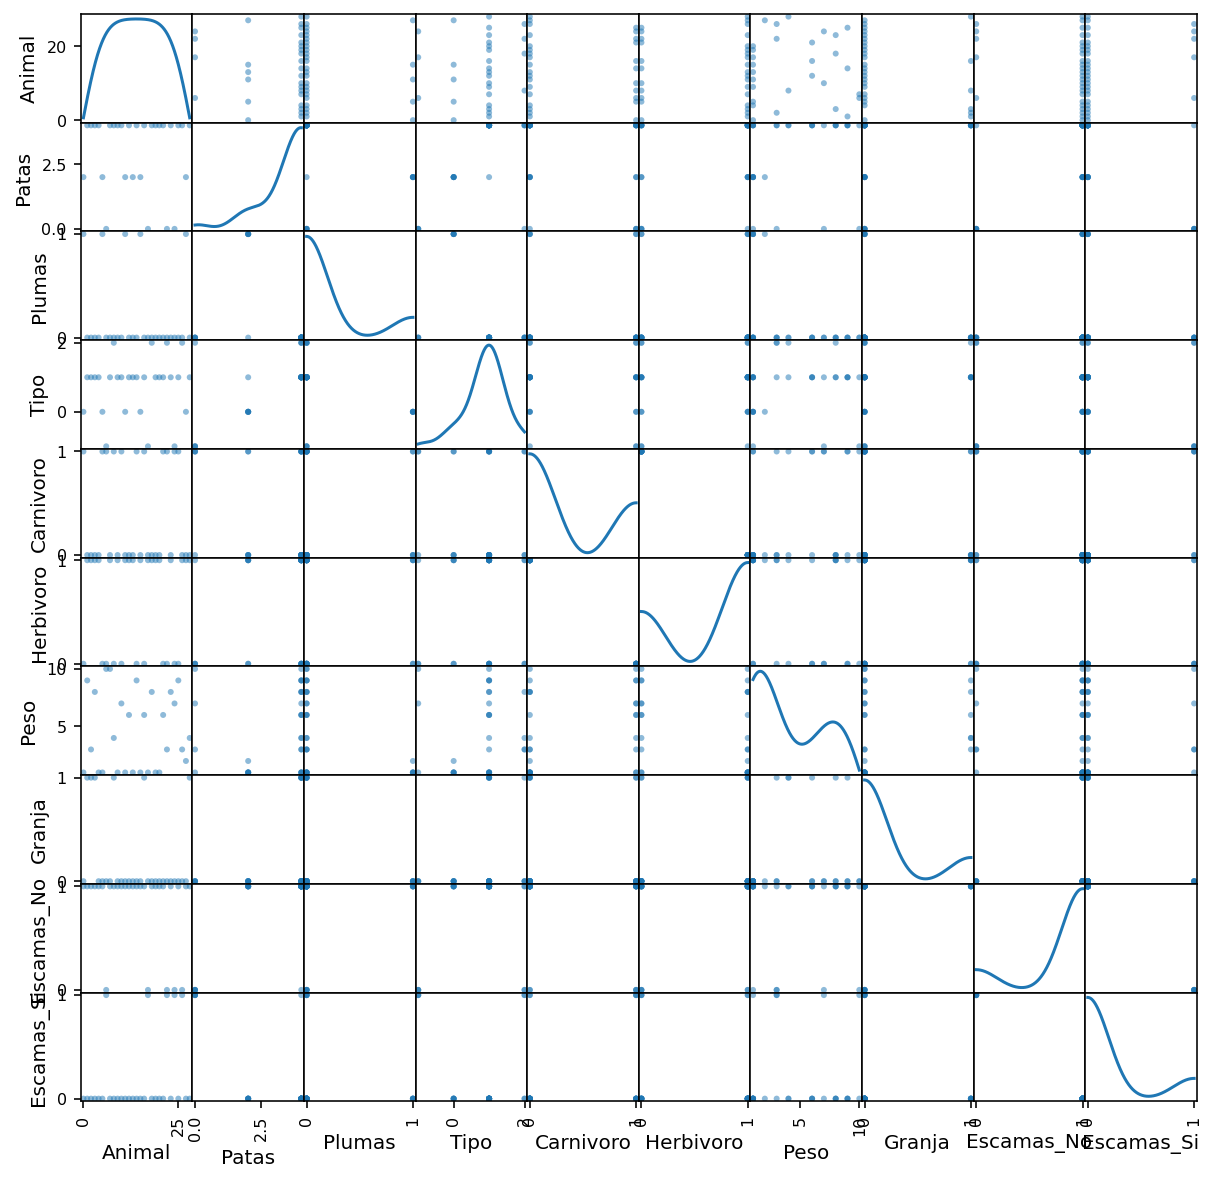

In [162]:
scatter_matrix(df, 
               figsize=(len(df.columns),
                              len(df.columns)),
               diagonal = 'kde');

In [163]:
input_dim = 9
output_dim = 9

model = Sequential()
model.add(Dense(5, input_dim=9, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))

In [164]:
sgd = SGD(lr=0.0001)
model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])

In [165]:
num_epochs = 200
batch_size = 5
history = model.fit(X, Y, 
              epochs=num_epochs, 
              batch_size=batch_size, 
              verbose=6)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

Text(0, 0.5, 'Error cuadrático medio')

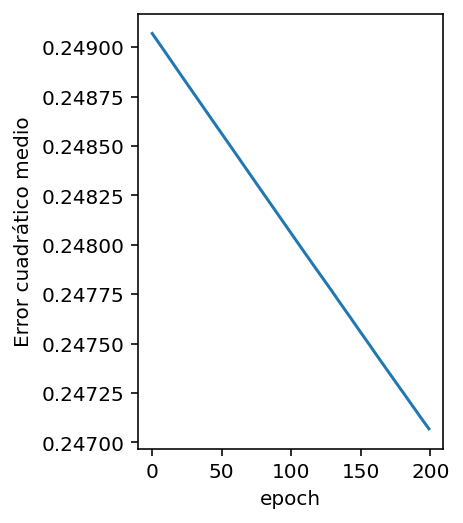

In [166]:
# Graficar el error vs epochs y el resultado de la regresión
# superpuesto a los datos originales
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('Error cuadrático medio')



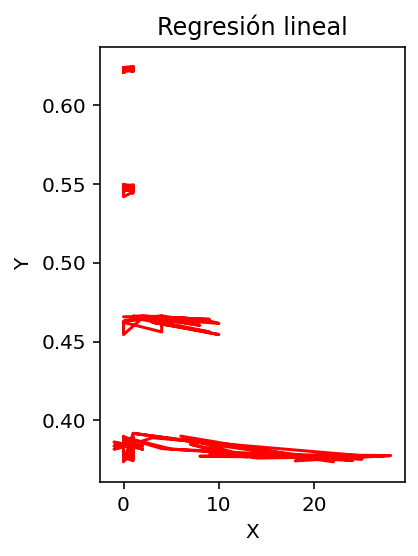

In [169]:
# Realizamos las predicciones sobre el conjunto X
predicciones_regression = model.predict(X)

plt.subplot(1, 2, 2)
plt.plot(X, predicciones_regression,'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal')
plt.show()